In [105]:
from PIL import Image

In [106]:
import numpy as np
import pandas as pd
import difflib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import os

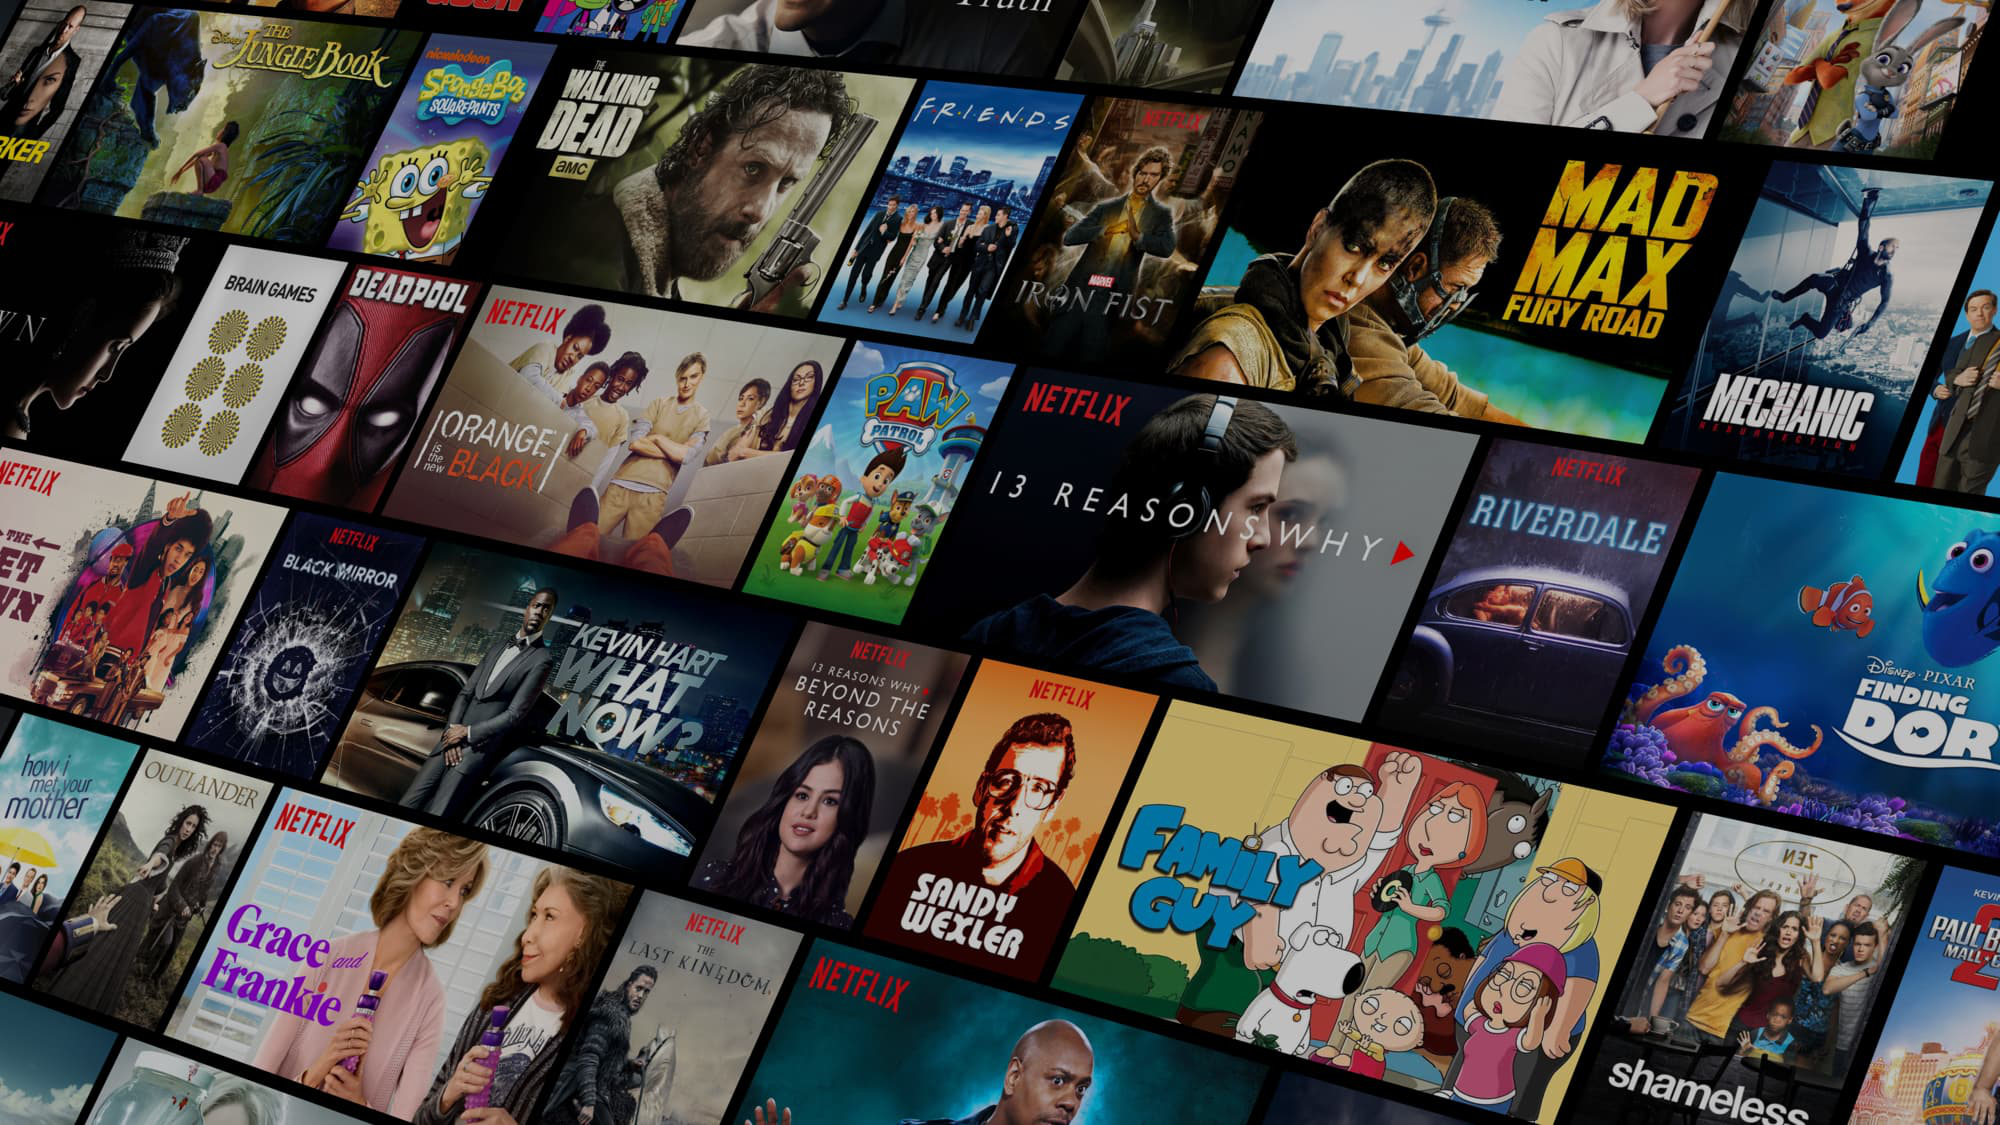

In [107]:
Image.open("image.jpg")

In current days, Everyone prefer online platforms for watching web series and new release movies on many OTT platform like NETFLIX, AMAZON PRIME, and many plateforms you can see. There are one thing common in every OTT plateform, is that if you watch one movie, related movie automatically suggested after end of the movie or during search time. Here, I tried to develop this program, through the help of ACMEGRADE internship of Machine Learning, of movie suggestion let's see how it works.

In [108]:
#Here, First List movies we have to fetch

In [109]:
os.chdir('C:\\Users\\ASUS\\Downloads')

In [110]:
df=pd.read_csv('movies.csv')
df.head()

index     budget                                    genres  \
0      0  237000000  Action Adventure Fantasy Science Fiction   
1      1  300000000                  Adventure Fantasy Action   
2      2  245000000                    Action Adventure Crime   
3      3  250000000               Action Crime Drama Thriller   
4      4  260000000          Action Adventure Science Fiction   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  culture clash future space war space colony so...                en   
1  ocean drug abuse exotic island east india trad...                en   
2         spy based on novel secret agent sequel mi6                en   
3  dc comics crime fighter terrorist secret ident...                en   
4  based on novel mars medallion space travel pri...                en   

                             original_title  \
0                                    Avatar   
1  Pirates of the Caribbean: At World's End   
2                                   Spectre   
3                     The Dark Knight Rises   
4                               John Carter   

                                            overview  popularity  ... runtime  \
0  In the 22nd century, a paraplegic Marine is di...  150.437577  ...   162.0   
1  Captain Barbossa, long believed to be dead, ha...  139.082615  ...   169.0   
2  A cryptic message from Bond’s past sends him o...  107.376788  ...   148.0   
3  Following the death of District Attorney Harve...  112.312950  ...   165.0   
4  John Carter is a war-weary, former military ca...   43.926995  ...   132.0   

                                    spoken_languages    status  \
0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
1           [{"iso_639_1": "en", "name": "English"}]  Released   
2  [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
3           [{"iso_639_1": "en", "name": "English"}]  Released   
4           [{"iso_639_1": "en", "name": "English"}]  Released   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                      title vote_average vote_count  \
0                                    Avatar          7.2      11800   
1  Pirates of the Caribbean: At World's End          6.9       4500   
2                                   Spectre          6.3       4466   
3                     The Dark Knight Rises          7.6       9106   
4                               John Carter          6.1       2124   

                                                cast  \
0  Sam Worthington Zoe Saldana Sigourney Weaver S...   
1  Johnny Depp Orlando Bloom Keira Knightley Stel...   
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...   
3  Christian Bale Michael Caine Gary Oldman Anne ...   
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...   

                                                crew           director  
0  [{'name': 'Stephen E. Rivkin', 'gender': 0, 'd...      James Cameron  
1  [{'name': 'Dariusz Wolski', 'gender': 2, 'depa...     Gore Verbinski  
2  [{'name': 'Thomas Newman', 'gender': 2, 'depar...         Sam Mendes  
3  [{'name': 'Hans Zimmer', 'gender': 2, 'departm...  Christopher Nolan  
4  [{'name': 'Andrew Stanton', 'gender': 2, 'depa...     Andrew Stanton  

[5 rows x 24 columns]

In [111]:
df.shape

(4803, 24)

In [112]:
#We need these columns only for fetching suggestion

In [113]:
selected_columns=['genres','keywords','tagline','cast','director']
selected_columns

['genres', 'keywords', 'tagline', 'cast', 'director']

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 4803 non-null   int64  
 1   budget                4803 non-null   int64  
 2   genres                4775 non-null   object 
 3   homepage              1712 non-null   object 
 4   id                    4803 non-null   int64  
 5   keywords              4391 non-null   object 
 6   original_language     4803 non-null   object 
 7   original_title        4803 non-null   object 
 8   overview              4800 non-null   object 
 9   popularity            4803 non-null   float64
 10  production_companies  4803 non-null   object 
 11  production_countries  4803 non-null   object 
 12  release_date          4802 non-null   object 
 13  revenue               4803 non-null   int64  
 14  runtime               4801 non-null   float64
 15  spoken_languages     

In [115]:
#You can see many columns and selected columns have many null values, I need to fill it

In [116]:
df.isnull().sum()

index                      0
budget                     0
genres                    28
homepage                3091
id                         0
keywords                 412
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                      43
crew                       0
director                  30
dtype: int64

In [117]:
display(df[selected_columns].head())

genres  \
0  Action Adventure Fantasy Science Fiction   
1                  Adventure Fantasy Action   
2                    Action Adventure Crime   
3               Action Crime Drama Thriller   
4          Action Adventure Science Fiction   

                                            keywords  \
0  culture clash future space war space colony so...   
1  ocean drug abuse exotic island east india trad...   
2         spy based on novel secret agent sequel mi6   
3  dc comics crime fighter terrorist secret ident...   
4  based on novel mars medallion space travel pri...   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                                cast           director  
0  Sam Worthington Zoe Saldana Sigourney Weaver S...      James Cameron  
1  Johnny Depp Orlando Bloom Keira Knightley Stel...     Gore Verbinski  
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...         Sam Mendes  
3  Christian Bale Michael Caine Gary Oldman Anne ...  Christopher Nolan  
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...     Andrew Stanton

In [118]:
#I filled all null place through space beacuse it is difficult to under stand and fill with proper data

In [119]:
print("Before filling all null values")
print(df[selected_columns].isnull().sum(),"\n")
for col in selected_columns:
    df[col]=df[col].fillna('')
print("After filling all null values")
display(df[selected_columns].isnull().sum())
df[selected_columns].head()

Before filling all null values
genres       28
keywords    412
tagline     844
cast         43
director     30
dtype: int64 

After filling all null values


genres      0
keywords    0
tagline     0
cast        0
director    0
dtype: int64

genres  \
0  Action Adventure Fantasy Science Fiction   
1                  Adventure Fantasy Action   
2                    Action Adventure Crime   
3               Action Crime Drama Thriller   
4          Action Adventure Science Fiction   

                                            keywords  \
0  culture clash future space war space colony so...   
1  ocean drug abuse exotic island east india trad...   
2         spy based on novel secret agent sequel mi6   
3  dc comics crime fighter terrorist secret ident...   
4  based on novel mars medallion space travel pri...   

                                          tagline  \
0                     Enter the World of Pandora.   
1  At the end of the world, the adventure begins.   
2                           A Plan No One Escapes   
3                                 The Legend Ends   
4            Lost in our world, found in another.   

                                                cast           director  
0  Sam Worthington Zoe Saldana Sigourney Weaver S...      James Cameron  
1  Johnny Depp Orlando Bloom Keira Knightley Stel...     Gore Verbinski  
2  Daniel Craig Christoph Waltz L\u00e9a Seydoux ...         Sam Mendes  
3  Christian Bale Michael Caine Gary Oldman Anne ...  Christopher Nolan  
4  Taylor Kitsch Lynn Collins Samantha Morton Wil...     Andrew Stanton

In [120]:
#I just tried to bag all values in one.

In [121]:
combined_features=df['genres']+df['keywords']+df['tagline']+df['cast']+df['director']
display(combined_features)

0       Action Adventure Fantasy Science Fictioncultur...
1       Adventure Fantasy Actionocean drug abuse exoti...
2       Action Adventure Crimespy based on novel secre...
3       Action Crime Drama Thrillerdc comics crime fig...
4       Action Adventure Science Fictionbased on novel...
                              ...                        
4798    Action Crime Thrillerunited states\u2013mexico...
4799    Comedy RomanceA newlywed couple's honeymoon is...
4800    Comedy Drama Romance TV Moviedate love at firs...
4801    A New Yorker in ShanghaiDaniel Henney Eliza Co...
4802    Documentaryobsession camcorder crush dream gir...
Length: 4803, dtype: object

In [122]:
vectorizer=TfidfVectorizer()
feature_vectors=vectorizer.fit_transform(combined_features)
display(feature_vectors.shape)
print(feature_vectors)

(4803, 27580)

  (0, 3583)	0.16941894714909375
  (0, 20729)	0.2738578969459924
  (0, 16614)	0.15696073877453268
  (0, 14550)	0.2236809363648068
  (0, 23267)	0.16128139780622516
  (0, 26547)	0.19638671147741732
  (0, 22464)	0.20207089568711745
  (0, 21487)	0.21550128478931546
  (0, 27540)	0.19771357974524176
  (0, 27182)	0.23480088356130552
  (0, 21521)	0.1562356665943368
  (0, 18558)	0.2612168335104853
  (0, 18164)	0.08690831799482265
  (0, 27161)	0.1261988657937151
  (0, 24197)	0.07518543993419265
  (0, 22778)	0.2738578969459924
  (0, 4676)	0.2452909770424961
  (0, 26334)	0.13059723071916296
  (0, 22916)	0.33668756406929184
  (0, 10193)	0.16532432420812987
  (0, 4456)	0.21799675215510664
  (0, 9304)	0.2738578969459924
  (0, 21836)	0.09966592997173944
  (0, 8936)	0.11806131645084653
  (0, 444)	0.09109355212252294
  :	:
  (4801, 5449)	0.31510541707008866
  (4801, 22170)	0.31510541707008866
  (4801, 27361)	0.31510541707008866
  (4801, 27513)	0.3005604008026175
  (4801, 8121)	0.2611505149930138
  (4801,

In [123]:
#Here, All values come nearest to 1 and it defines the closest relation of the selected data

In [124]:
similarity=cosine_similarity(feature_vectors)
print(similarity)

[[1.         0.06865296 0.01492221 ... 0.         0.         0.        ]
 [0.06865296 1.         0.02799128 ... 0.01243107 0.         0.        ]
 [0.01492221 0.02799128 1.         ... 0.         0.         0.        ]
 ...
 [0.         0.01243107 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


In [125]:
similarity.shape

(4803, 4803)

In [126]:
pd.DataFrame(similarity)

0         1         2         3         4         5         6     \
0     1.000000  0.068653  0.014922  0.006768  0.095074  0.028425  0.008543   
1     0.068653  1.000000  0.027991  0.000000  0.027865  0.051419  0.014938   
2     0.014922  0.027991  1.000000  0.031043  0.042742  0.021856  0.008808   
3     0.006768  0.000000  0.031043  1.000000  0.006632  0.038466  0.000000   
4     0.095074  0.027865  0.042742  0.006632  1.000000  0.073816  0.008372   
...        ...       ...       ...       ...       ...       ...       ...   
4798  0.004522  0.000000  0.004662  0.022020  0.004432  0.004646  0.000000   
4799  0.011439  0.024283  0.000000  0.000000  0.000000  0.006722  0.000000   
4800  0.000000  0.012431  0.000000  0.005113  0.000000  0.014608  0.000000   
4801  0.000000  0.000000  0.000000  0.000000  0.025858  0.000000  0.022062   
4802  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9     ...      4793  4794      4795      4796  \
0     0.024557  0.031423  0.014609  ...  0.000000   0.0  0.005361  0.008324   
1     0.014598  0.042091  0.014645  ...  0.022748   0.0  0.014061  0.000000   
2     0.075657  0.009024  0.043627  ...  0.046587   0.0  0.000000  0.000000   
3     0.006809  0.034327  0.049489  ...  0.032650   0.0  0.024547  0.029844   
4     0.034356  0.008578  0.024640  ...  0.000000   0.0  0.000000  0.034673   
...        ...       ...       ...  ...       ...   ...       ...       ...   
4798  0.026889  0.000000  0.004564  ...  0.000000   0.0  0.014248  0.000000   
4799  0.000000  0.006901  0.000000  ...  0.000000   0.0  0.004644  0.000000   
4800  0.000000  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.003910   
4801  0.021561  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000   
4802  0.000000  0.000000  0.000000  ...  0.000000   0.0  0.000000  0.000000   

      4797      4798      4799      4800      4801  4802  
0      0.0  0.004522  0.011439  0.000000  0.000000   0.0  
1      0.0  0.000000  0.024283  0.012431  0.000000   0.0  
2      0.0  0.004662  0.000000  0.000000  0.000000   0.0  
3      0.0  0.022020  0.000000  0.005113  0.000000   0.0  
4      0.0  0.004432  0.000000  0.000000  0.025858   0.0  
...    ...       ...       ...       ...       ...   ...  
4798   0.0  1.000000  0.000000  0.000000  0.000000   0.0  
4799   0.0  0.000000  1.000000  0.004822  0.000000   0.0  
4800   0.0  0.000000  0.004822  1.000000  0.000000   0.0  
4801   0.0  0.000000  0.000000  0.000000  1.000000   0.0  
4802   0.0  0.000000  0.000000  0.000000  0.000000   1.0  

[4803 rows x 4803 columns]

In [127]:
#First need to read data from user.

In [128]:
movie_name=input("Search your favourite one: ")
movie_name

Search your favourite one:  avenger


'avenger'

In [129]:
#for finding related suggestion, I need to make a list of titles of movies

In [130]:
listOfAllTitles=df['title'].tolist()
print(listOfAllTitles)

['Avatar', "Pirates of the Caribbean: At World's End", 'Spectre', 'The Dark Knight Rises', 'John Carter', 'Spider-Man 3', 'Tangled', 'Avengers: Age of Ultron', 'Harry Potter and the Half-Blood Prince', 'Batman v Superman: Dawn of Justice', 'Superman Returns', 'Quantum of Solace', "Pirates of the Caribbean: Dead Man's Chest", 'The Lone Ranger', 'Man of Steel', 'The Chronicles of Narnia: Prince Caspian', 'The Avengers', 'Pirates of the Caribbean: On Stranger Tides', 'Men in Black 3', 'The Hobbit: The Battle of the Five Armies', 'The Amazing Spider-Man', 'Robin Hood', 'The Hobbit: The Desolation of Smaug', 'The Golden Compass', 'King Kong', 'Titanic', 'Captain America: Civil War', 'Battleship', 'Jurassic World', 'Skyfall', 'Spider-Man 2', 'Iron Man 3', 'Alice in Wonderland', 'X-Men: The Last Stand', 'Monsters University', 'Transformers: Revenge of the Fallen', 'Transformers: Age of Extinction', 'Oz: The Great and Powerful', 'The Amazing Spider-Man 2', 'TRON: Legacy', 'Cars 2', 'Green Lant

In [131]:
#Then find the close match from user data to titles of movies

In [132]:
findCloseMatch=difflib.get_close_matches(movie_name,listOfAllTitles)
findCloseMatch

['The Avengers']

In [133]:
#After finding of closet data need to pick first, because it is totally nearest to the data.

In [134]:
closeMatch=findCloseMatch[0]
closeMatch

'The Avengers'

In [135]:
#After find the index of the close match

In [136]:
indexOfTheMatch=df[df.title==closeMatch]['index'].values[0]
print(indexOfTheMatch)

16


In [137]:
#Then find score of all Similar data of the movie

In [138]:
similarityScore=list(enumerate(similarity[indexOfTheMatch]))
print(similarityScore)

[(0, 0.015430503883444698), (1, 0.0), (2, 0.03320793032844293), (3, 0.006482452679358777), (4, 0.024918771275211457), (5, 0.006077636981019067), (6, 0.0), (7, 0.6424444374106305), (8, 0.0), (9, 0.129753120205267), (10, 0.017827681221460202), (11, 0.005490100242913767), (12, 0.0), (13, 0.005731579013364707), (14, 0.14044013634950725), (15, 0.009683526480953032), (16, 1.0000000000000004), (17, 0.005821328598807161), (18, 0.015014574494127455), (19, 0.005188994552091901), (20, 0.09849429292850052), (21, 0.022614030968416687), (22, 0.0), (23, 0.0), (24, 0.0), (25, 0.010202317448049444), (26, 0.27072517284276515), (27, 0.013958274926309428), (28, 0.06669106234451065), (29, 0.016859771882894267), (30, 0.10187389042229436), (31, 0.13233370972545233), (32, 0.009227840090727349), (33, 0.21574628614927752), (34, 0.0), (35, 0.03255470344645148), (36, 0.048991462469535695), (37, 0.0), (38, 0.19238862715348617), (39, 0.015346026961909053), (40, 0.0), (41, 0.06769785467139805), (42, 0.0), (43, 0.030

In [139]:
#When I find all movie list, I just need to arrange it in desanding order.

In [140]:
sortedSimilarMovie=sorted(similarityScore, key=lambda x:x[1],reverse=True)
sortedSimilarMovie

[(16, 1.0000000000000004),
 (7, 0.6424444374106305),
 (85, 0.31403222285225124),
 (79, 0.3079262376488009),
 (174, 0.29013768374125826),
 (26, 0.27072517284276515),
 (511, 0.24575680030469998),
 (129, 0.23357780859998828),
 (64, 0.22923948760243926),
 (203, 0.2275446181024672),
 (126, 0.21723322801194822),
 (33, 0.21574628614927752),
 (788, 0.20991954983251357),
 (182, 0.20377339938691708),
 (38, 0.19238862715348617),
 (46, 0.18596229870041542),
 (68, 0.18564323259620552),
 (4401, 0.1578729419133452),
 (14, 0.14044013634950725),
 (870, 0.1345993415810784),
 (101, 0.1342865289051365),
 (1740, 0.13361448192535913),
 (31, 0.13233370972545233),
 (782, 0.13123248761119302),
 (9, 0.129753120205267),
 (421, 0.1296594419960994),
 (2235, 0.1294118632931165),
 (94, 0.1226053076563336),
 (2197, 0.1205961620143664),
 (1720, 0.11794114743291353),
 (700, 0.11474815446962623),
 (4759, 0.10560063415361388),
 (169, 0.10237623872970078),
 (356, 0.10232776916102307),
 (30, 0.10187389042229436),
 (615, 0.

In [141]:
#the first movie is totally related to the data and else are suggested movies
print("Movie suggest to you: ")
i=1
for movie in sortedSimilarMovie:
    index=movie[0]
    titleFromIndex=df[df.index==index]['title'].values[0]
    if(i<30):
        print(i,'-',titleFromIndex)
        i+=1

Movie suggest to you: 
1 - The Avengers
2 - Avengers: Age of Ultron
3 - Captain America: The Winter Soldier
4 - Iron Man 2
5 - The Incredible Hulk
6 - Captain America: Civil War
7 - X-Men
8 - Thor
9 - X-Men: Apocalypse
10 - X2
11 - Thor: The Dark World
12 - X-Men: The Last Stand
13 - Deadpool
14 - Ant-Man
15 - The Amazing Spider-Man 2
16 - X-Men: Days of Future Past
17 - Iron Man
18 - The Helix... Loaded
19 - Man of Steel
20 - Superman II
21 - X-Men: First Class
22 - Kick-Ass 2
23 - Iron Man 3
24 - The Spirit
25 - Batman v Superman: Dawn of Justice
26 - Zodiac
27 - A Scanner Darkly
28 - Guardians of the Galaxy
29 - What's Your Number?


In [143]:
#Here, I combined all codes under the function and it is ready now
def movieRecommend(movie_name):
    suggestedMovieList=[]
    findCloseMatch=difflib.get_close_matches(movie_name,listOfAllTitles)
    closeMatch=findCloseMatch[0]
    indexOfTheMatch=df[df.title==closeMatch]['index'].values[0]
    similarityScore=list(enumerate(similarity[indexOfTheMatch]))
    sortedSimilarMovie=sorted(similarityScore, key=lambda x:x[1],reverse=True)
    print("Movie suggest to you: ")
    i=0
    for movie in sortedSimilarMovie:
        index=movie[0]
        titleFromIndex=df[df.index==index]['title'].values[0]
        if(i<30):
            suggestedMovieList.append(titleFromIndex)
            i+=1
    return suggestedMovieList
def main():
    ch=0
    while ch!=2:
        print("          Movie Suggestion          ")
        print("------------------------------------\n")
        print("1: For Continue")
        print("2: Close")
        ch=int(input("Your Choice: "))
        if ch==1:
            NameOfMovie=input("\n\nSearch Your Favourite movie: ")
            x=movieRecommend(NameOfMovie)
            display(pd.DataFrame(x))
        elif ch==2:
            break
if __name__=="__main__":
    listOfAllTitles=df['title'].tolist()
    main()

          Movie Suggestion          
------------------------------------

1: For Continue
2: Close


Your Choice:  1


Search Your Favourite movie:  thor


Movie suggest to you: 


0
0                                         Thor
1                         Thor: The Dark World
2                                 The Avengers
3                                   Cinderella
4          Captain America: The Winter Soldier
5                      Avengers: Age of Ultron
6                    Jack Ryan: Shadow Recruit
7                                     Deadpool
8                                   Iron Man 2
9                                 Spider-Man 2
10                  X-Men: Days of Future Past
11                                       X-Men
12    Pirates of the Caribbean: At World's End
13                    The Amazing Spider-Man 2
14                       X-Men: The Last Stand
15                                     Henry V
16                  Captain America: Civil War
17  Pirates of the Caribbean: Dead Man's Chest
18                           X-Men: Apocalypse
19                              City of Ghosts
20                                 Bad Company
21                                          X2
22                                      Hamlet
23                           The Mask of Zorro
24                         Our Kind of Traitor
25                                        Rush
26                             Angels & Demons
27                         The Incredible Hulk
28                 Snow White and the Huntsman
29          You Will Meet a Tall Dark Stranger

          Movie Suggestion          
------------------------------------

1: For Continue
2: Close


Your Choice:  2
